In [1]:
from dtw import dtw
import math
import numpy as np
from random import *
from scipy.spatial.distance import euclidean
from scipy import stats
from fastdtw import fastdtw
from sklearn.preprocessing import MinMaxScaler
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def convert_arry(temp):
    arr = np.array([float(x[1]) for x in temp])
    return arr

In [3]:
def createZeroArray(size):
    return np.array([0]*size).reshape(-1, 1)

In [4]:
def computeDistance(array1, array2):
#     array1 = convert_arry(array1).reshape(-1, 1)
#     array2 = convert_arry(array2).reshape(-1, 1)
    array1 = array1.reshape(-1, 1)
    array2 = array2.reshape(-1, 1)
    distanceXY, _ = fastdtw(stats.zscore(array1), stats.zscore(array2),  dist=euclidean)
    size = max(len(array1),len(array2))
    distanceX0, _ = fastdtw(stats.zscore(array1), createZeroArray(size), dist=euclidean)
    distance0Y, _ = fastdtw(createZeroArray(size), stats.zscore(array2), dist=euclidean)
    correlation = 1 - (distanceXY/(distanceX0 + distance0Y))
    return correlation


In [5]:
poverty_df = pd.read_csv("Poverty/poverty_poor2011.csv",index_col=0,names=["Borough","2011"])
total_pov_df = pd.read_csv("Poverty/poverty_total2011.csv",index_col=0,names=["Borough","2011"])
column = "2011"
poverty_df[column]=poverty_df[column].div(total_pov_df[column],axis=0)
poverty_df.loc[:,column] *= 100

In [6]:
years =["2012","2013","2014","2015","2016"]
for year in years:
    column = year
    pov_df = pd.read_csv("Poverty/poverty_poor"+year+".csv",index_col=0,names=["Borough",column])
    total_pov_df = pd.read_csv("Poverty/poverty_total"+year+".csv",index_col=0,names=["Borough",column])
    pov_df[column]= pov_df[column].div(total_pov_df[column],axis=0)
    pov_df.loc[:,column] *= 100
    poverty_df = pd.concat([poverty_df,pov_df],axis=1)
poverty_df

,2011,2012,2013,2014,2015,2016
Borough,,,,,,
QUEENS,13.042832,13.702666,12.935515,12.341058,11.542512,11.230146
BROOKLYN,20.510082,20.956452,19.962312,19.597343,18.536486,16.932118
BRONX,28.293502,29.000685,27.940578,27.956261,26.414358,24.821963
MANHATTAN,16.564488,16.521423,16.597412,15.370306,14.799809,14.647727
STATEN ISLAND,8.985879,8.841068,11.042337,10.582822,10.200587,10.421341


In [7]:
not_in_college_df = pd.read_csv("Poverty/poverty_not_in_college_2011.csv",index_col=0,names=["Borough","2011"])
total_pov_df = pd.read_csv("Poverty/poverty_total2011.csv",index_col=0,names=["Borough","2011"])
column = "2011"
not_in_college_df[column]=not_in_college_df[column].div(total_pov_df[column],axis=0)
not_in_college_df.loc[:,column] *= 100

In [8]:
years =["2012","2013","2014","2015","2016"]
for year in years:
    column = year
    pov_df = pd.read_csv("Poverty/poverty_not_in_college_"+year+".csv",index_col=0,names=["Borough",column])
    total_pov_df = pd.read_csv("Poverty/poverty_total"+year+".csv",index_col=0,names=["Borough",column])
    pov_df[column]= pov_df[column].div(total_pov_df[column],axis=0)
    pov_df.loc[:,column] *= 100
    not_in_college_df = pd.concat([not_in_college_df,pov_df],axis=1)
not_in_college_df

,2011,2012,2013,2014,2015,2016
Borough,,,,,,
QUEENS,52.533214,52.864181,51.472570,50.837292,51.348381,50.244539
BROOKLYN,54.169515,53.246154,52.814070,51.718555,50.562576,49.997974
BRONX,63.598657,63.100714,60.612536,61.157345,61.041748,60.243575
MANHATTAN,35.187970,33.067054,32.150065,31.252180,30.958055,31.227273
STATEN ISLAND,51.861361,50.168525,51.423620,50.255624,49.535225,49.613563


In [9]:
# Assault data for each borough from 2011-2016
assault_df = pd.read_csv("Crime/borough_crime/total_borough_asssault_crime_2011.csv",index_col=0)
assault_df.rename(columns=lambda x: "2011", inplace=True)
years =["2012","2013","2014","2015","2016"]
for year in years:
    column = "Count_"+year
    crime_df = pd.read_csv("Crime/borough_crime/total_borough_asssault_crime_"+year+".csv",index_col=0)
    crime_df.rename(columns=lambda x: year, inplace=True)
    assault_df = pd.concat([assault_df,crime_df],axis=1)
assault_df.head()

,2011,2012,2013,2014,2015,2016
BRONX,12450.0,13516.0,13310,13562.0,13290.0,13506.0
BROOKLYN,16414.0,17496.0,16931,16881.0,16092.0,15731.0
MANHATTAN,9667.0,10140.0,9912,9872.0,10061.0,10339.0
QUEENS,10095.0,10721.0,11133,11146.0,10556.0,10457.0
STATEN ISLAND,2235.0,2619.0,2249,2306.0,2204.0,2149.0


In [10]:
# Burgulary data for each borough from 2011-2016
burgulary_df = pd.read_csv("Crime/borough_crime/total_borough_burgulary_crime_2011.csv",index_col=0)
burgulary_df.rename(columns=lambda x: "2011", inplace=True)
years =["2012","2013","2014","2015","2016"]
for year in years:
    column = "Count_"+year
    crime_df = pd.read_csv("Crime/borough_crime/total_borough_burgulary_crime_"+year+".csv",index_col=0)
    crime_df.rename(columns=lambda x: year, inplace=True)
    burgulary_df = pd.concat([burgulary_df,crime_df],axis=1)

burgulary_df = burgulary_df.dropna()

In [11]:
# Murder data for each borough from 2011-2016
murder_df = pd.read_csv("Crime/borough_crime/total_borough_murder_crime_2011.csv",index_col=0)
murder_df.rename(columns=lambda x: "2011", inplace=True)
years =["2012","2013","2014","2015","2016"]
for year in years:
    column = "Count_"+year
    crime_df = pd.read_csv("Crime/borough_crime/total_borough_murder_crime_"+year+".csv",index_col=0)
    crime_df.rename(columns=lambda x: year, inplace=True)
    murder_df = pd.concat([murder_df,crime_df],axis=1)
murder_df = murder_df.dropna()
murder_df

,2011,2012,2013,2014,2015,2016
BORO_NM,,,,,,
BRONX,140,115,79,95,93,88
BROOKLYN,191,147,140,123,138,123
MANHATTAN,68,57,37,35,39,38
QUEENS,80,84,58,62,59,46
STATEN ISLAND,15,10,7,16,15,19


In [12]:
# Vehicle Crime data for each borough from 2011-2016
vehicle_crime_df = pd.read_csv("Crime/borough_crime/total_borough_vehicle_crime_2011.csv",index_col=0)
vehicle_crime_df.rename(columns=lambda x: "2011", inplace=True)
years =["2012","2013","2014","2015","2016"]
for year in years:
    column = "Count_"+year
    crime_df = pd.read_csv("Crime/borough_crime/total_borough_vehicle_crime_"+year+".csv",index_col=0)
    crime_df.rename(columns=lambda x: year, inplace=True)
    vehicle_crime_df = pd.concat([vehicle_crime_df,crime_df],axis=1)
vehicle_crime_df = vehicle_crime_df.dropna()
vehicle_crime_df

,2011,2012,2013,2014,2015,2016
BRONX,1295.0,1206.0,1499,1253.0,1205.0,1373.0
BROOKLYN,1522.0,1565.0,1678,1610.0,1720.0,1774.0
MANHATTAN,1069.0,1113.0,1171,1027.0,1064.0,1077.0
QUEENS,1783.0,1531.0,1588,1791.0,2112.0,2154.0
STATEN ISLAND,152.0,155.0,150,157.0,176.0,180.0


In [13]:
plot_years = ["2010", "2011","2012","2013","2014","2015","2016"]
def plot_graph(df1,df2,label1,label2,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    ax1 = df1.plot(color='blue', grid=True, label=label1)
    ax2 = df2.plot(color='red', grid=True, secondary_y=True, label=label2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    ax1.set_xticklabels(plot_years)
    plt.show()

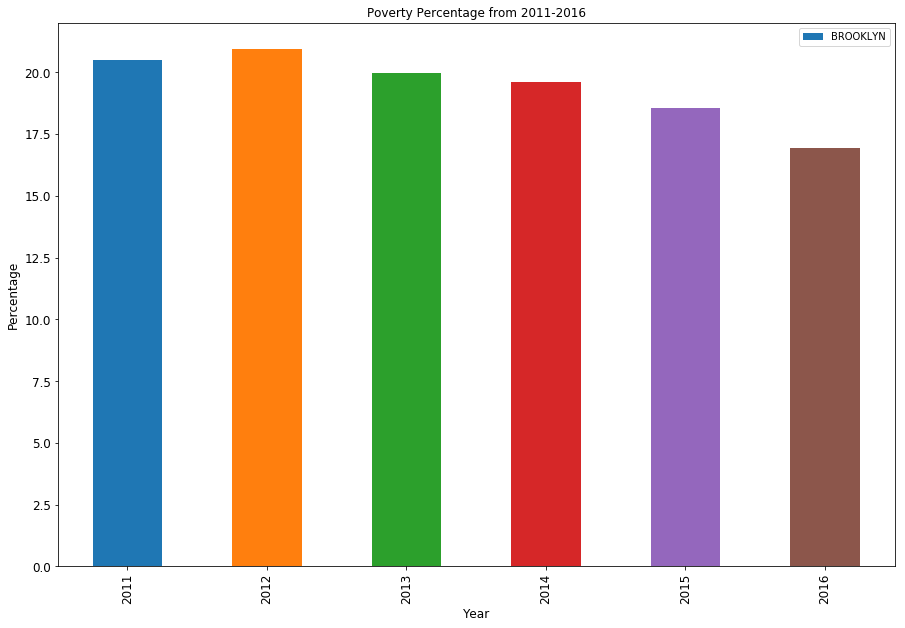

In [14]:
# Poverty in Brooklyn
ax = poverty_df.iloc[1].plot(kind='bar', title ="Poverty Percentage from 2011-2016", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show()


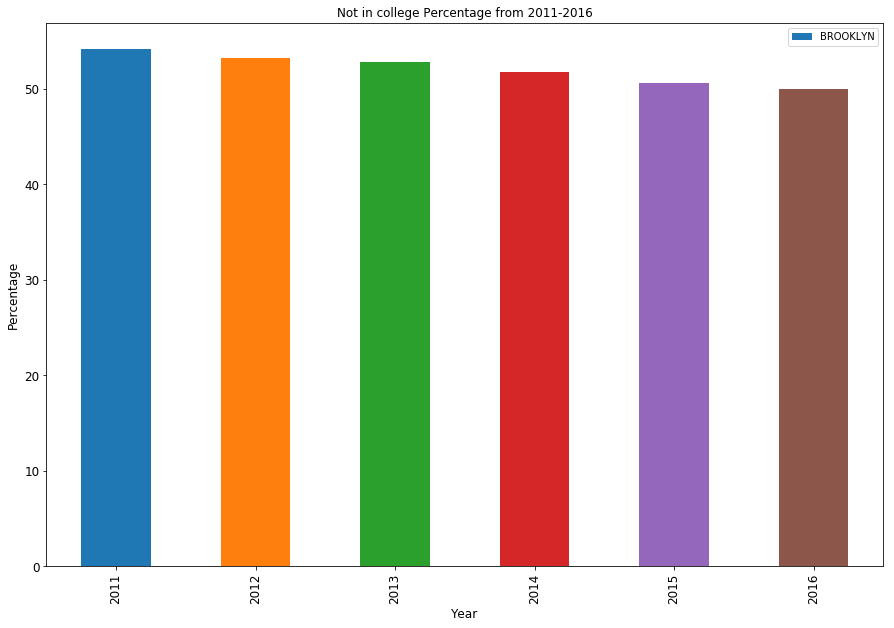

In [15]:
# Poverty in Manhattan
ax = not_in_college_df.iloc[1].plot(kind='bar', title ="Not in college Percentage from 2011-2016", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show()

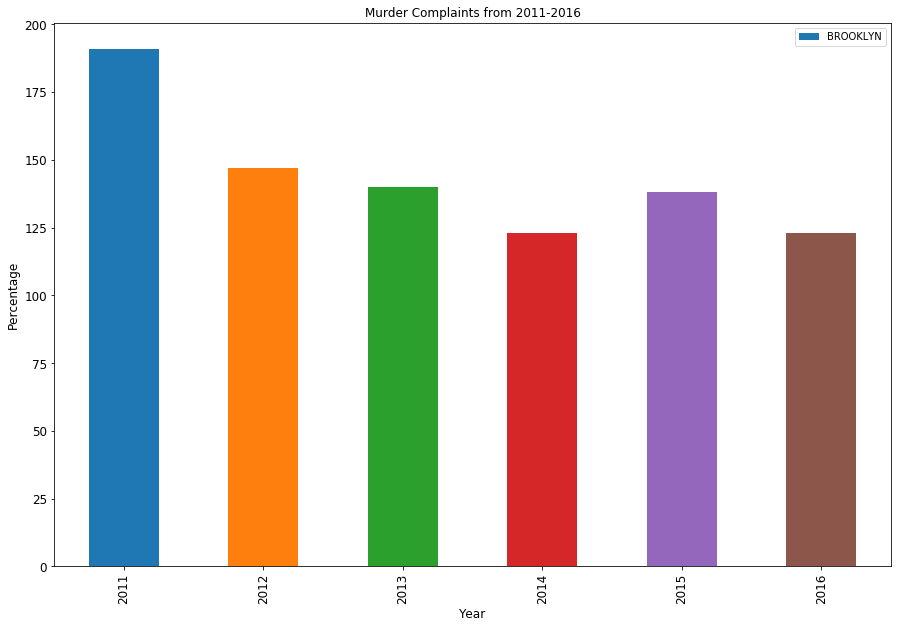

In [16]:
# Murder in Brooklyn
ax = murder_df.iloc[1].plot(kind='bar', title ="Murder Complaints from 2011-2016", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show()

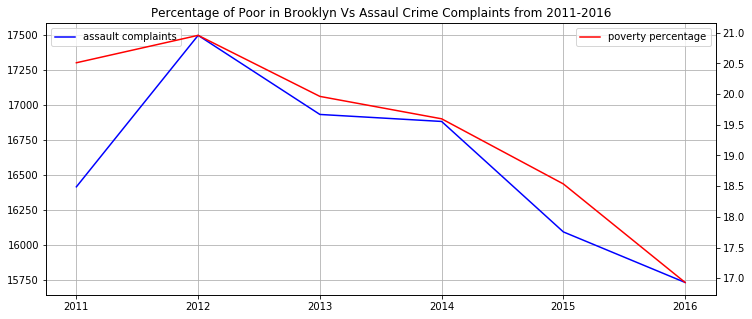

In [17]:
title = "Percentage of Poor in Brooklyn Vs Assaul Crime Complaints from 2011-2016"    
plot_graph(assault_df.iloc[1],poverty_df.iloc[1],"assault complaints","poverty percentage",title)

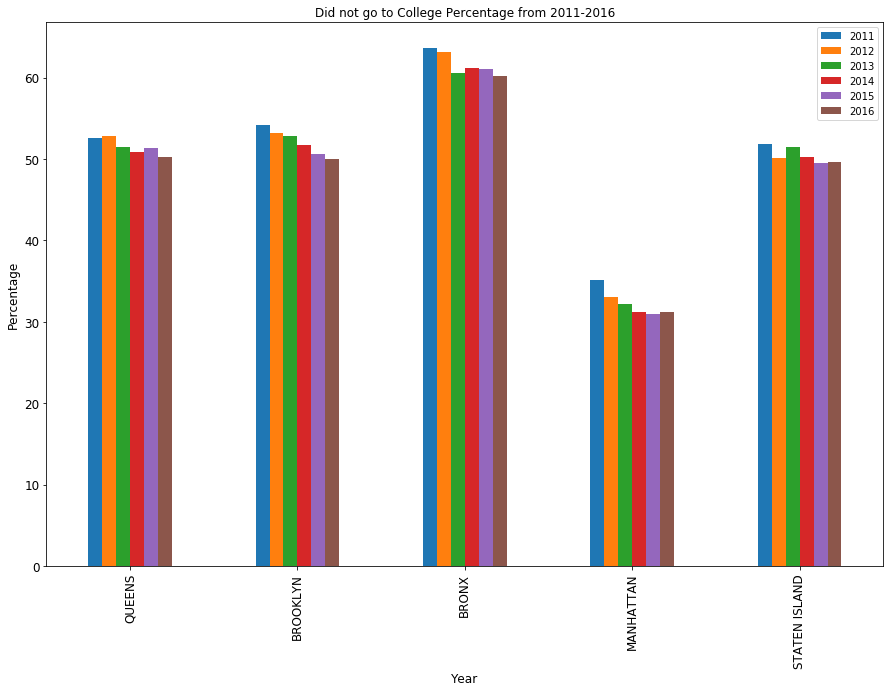

In [18]:
# Poverty in Manhattan
ax = not_in_college_df.plot(kind='bar', title ="Did not go to College Percentage from 2011-2016", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show()

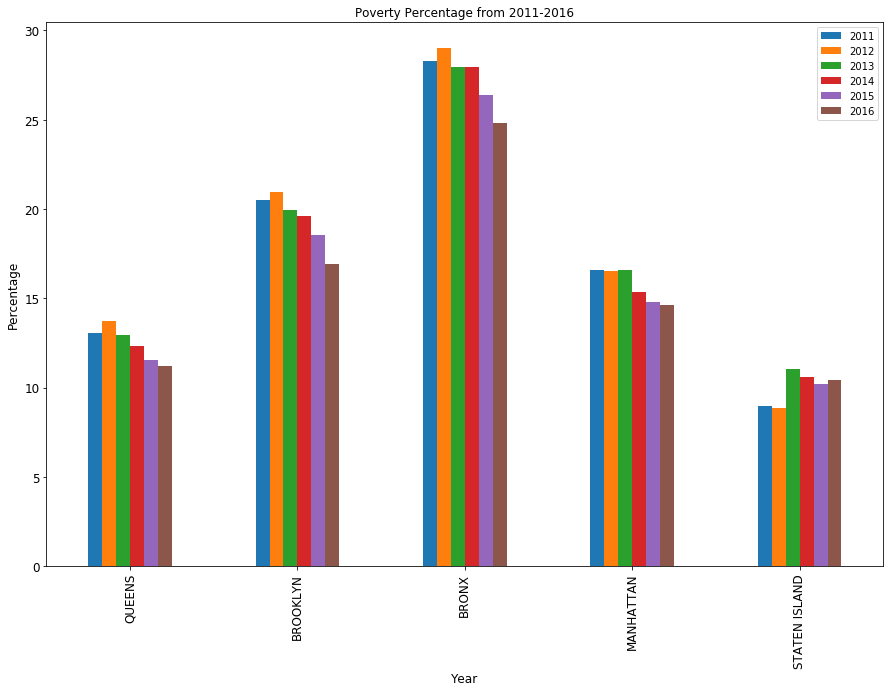

In [19]:
# Poverty in Manhattan
ax = poverty_df.plot(kind='bar', title ="Poverty Percentage from 2011-2016", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show()

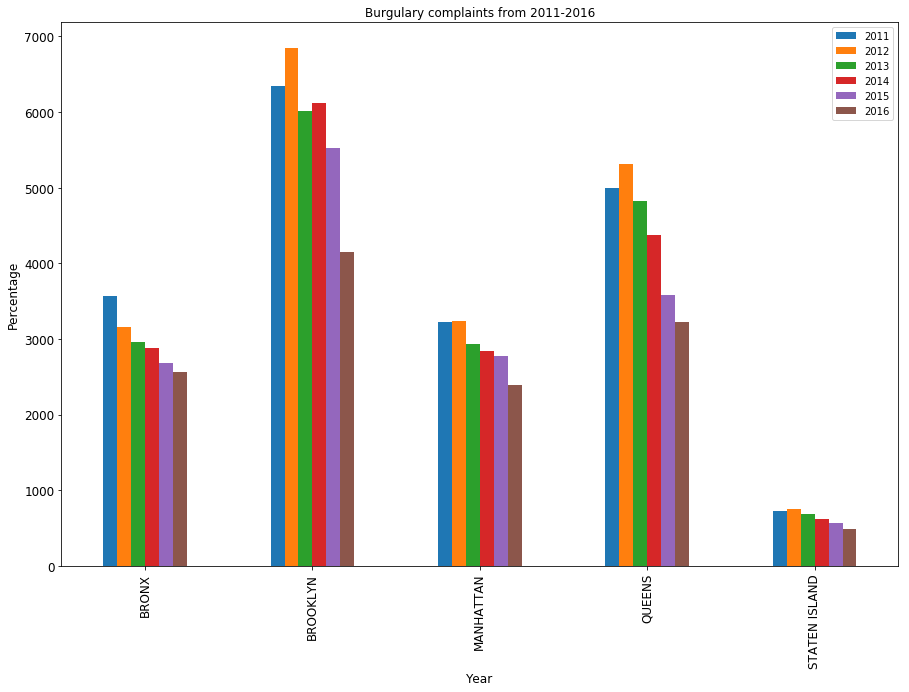

In [20]:
# Poverty in Manhattan
ax = burgulary_df.plot(kind='bar', title ="Burgulary complaints from 2011-2016", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show()



In [21]:
# Derrive Correlation between Crimes, Poverty and Education
# 1. Correaltion between Poverty and Crime:
print("*******Correlation between Poverty and Assault Crime********")
brooklyn_correaltion = computeDistance(poverty_df.iloc[1],assault_df.iloc[1])
bronx_correaltion = computeDistance(poverty_df.iloc[2],assault_df.iloc[0])
manhattan_correlation = computeDistance(poverty_df.iloc[3],assault_df.iloc[2])
staten_correlation = computeDistance(poverty_df.iloc[4],assault_df.iloc[4])
queens_correlation = computeDistance(poverty_df.iloc[0],assault_df.iloc[3])
print("\tBrooklyn:",brooklyn_correaltion)
print("\tBronx:",bronx_correaltion)
print("\tManhattan:",manhattan_correlation)
print("\tStaten ISLAND",staten_correlation)
print("\tQueens:",queens_correlation)

*******Correlation between Poverty and Assault Crime********
	Brooklyn: 0.7431624621671127
	Bronx: 0.23993436460375273
	Manhattan: 0.298558407954448
	Staten ISLAND 0.3677897538142657
	Queens: 0.4963928155301829


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [22]:
# Derrive Correlation between Crimes, Poverty and Education
# 1. Correaltion between NOT IN COLLEGE and Assault Crime:
print("*******Correlation between Not in college and Assault Crime********")
brooklyn_correaltion = computeDistance(not_in_college_df.iloc[1],assault_df.iloc[1])
bronx_correaltion = computeDistance(not_in_college_df.iloc[2],assault_df.iloc[0])
manhattan_correlation = computeDistance(not_in_college_df.iloc[3],assault_df.iloc[2])
staten_correlation = computeDistance(not_in_college_df.iloc[4],assault_df.iloc[4])
queens_correlation = computeDistance(not_in_college_df.iloc[0],assault_df.iloc[3])

print("\tBrooklyn:",brooklyn_correaltion)
print("\tBronx:",bronx_correaltion)
print("\tManhattan:",manhattan_correlation)
print("\tStaten ISLAND",staten_correlation)
print("\tQueens:",queens_correlation)

*******Correlation between Not in college and Assault Crime********
	Brooklyn: 0.7273656711627758
	Bronx: 0.13060778144535468
	Manhattan: 0.24194122824183562
	Staten ISLAND 0.5978907726141921
	Queens:

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


 0.4449387283383077


In [23]:
# Derrive Correlation between Crimes, Poverty and Education
# 1. Correaltion between NOT IN COLLEGE and Burgulary :
print("*******Correlation between Not in College and Burgulary Crime********")
brooklyn_correaltion = computeDistance(not_in_college_df.iloc[1],burgulary_df.iloc[1])
bronx_correaltion = computeDistance(not_in_college_df.iloc[2],burgulary_df.iloc[0])
manhattan_correlation = computeDistance(not_in_college_df.iloc[3],burgulary_df.iloc[2])
staten_correlation = computeDistance(not_in_college_df.iloc[4],burgulary_df.iloc[4])
queens_correlation = computeDistance(not_in_college_df.iloc[0],burgulary_df.iloc[3])

print("\tBrooklyn:",brooklyn_correaltion)
print("\tBronx:",bronx_correaltion)
print("\tManhattan:",manhattan_correlation)
print("\tStaten ISLAND",staten_correlation)
print("\tQueens:",queens_correlation)

*******Correlation between Not in College and Burgulary Crime********
	Brooklyn: 0.7018517674064312
	Bronx: 0.7845959952258525
	Manhattan: 0.6318334605548919
	Staten ISLAND 0.6802516750523186
	Queens: 0.7619236254282431


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [24]:
# Derrive Correlation between Crimes, Poverty and Education
# 1. Correaltion between Poverty and Burgulary :
print("*******Correlation between Not in Poverty and Burgulary Crime********")
brooklyn_correaltion = computeDistance(poverty_df.iloc[1],burgulary_df.iloc[1])
bronx_correaltion = computeDistance(poverty_df.iloc[2],burgulary_df.iloc[0])
manhattan_correlation = computeDistance(poverty_df.iloc[3],burgulary_df.iloc[2])
staten_correlation = computeDistance(poverty_df.iloc[4],burgulary_df.iloc[4])
queens_correlation = computeDistance(poverty_df.iloc[0],burgulary_df.iloc[3])

print("\tBrooklyn:",brooklyn_correaltion)
print("\tBronx:",bronx_correaltion)
print("\tManhattan:",manhattan_correlation)
print("\tStaten ISLAND",staten_correlation)
print("\tQueens:",queens_correlation)

*******Correlation between Not in Poverty and Burgulary Crime********
	Brooklyn: 0.8879595681863831
	Bronx: 0.6380303738053736
	Manhattan: 0.7702593171081048
	Staten ISLAND 0.22378263869509496
	Queens: 0.9414605435711638


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [25]:
# Derrive Correlation between Crimes, Poverty and Education
# 1. Correaltion between NOT IN COLLEGE and Murder :
print("*******Correlation between Not in College and Murder Crime********")
brooklyn_correaltion = computeDistance(not_in_college_df.iloc[1],murder_df.iloc[1])
bronx_correaltion = computeDistance(not_in_college_df.iloc[2],murder_df.iloc[0])
manhattan_correlation = computeDistance(not_in_college_df.iloc[3],murder_df.iloc[2])
staten_correlation = computeDistance(not_in_college_df.iloc[4],murder_df.iloc[4])
queens_correlation = computeDistance(not_in_college_df.iloc[0],murder_df.iloc[3])

print("\tBrooklyn:",brooklyn_correaltion)
print("\tBronx:",bronx_correaltion)
print("\tManhattan:",manhattan_correlation)
print("\tStaten ISLAND",staten_correlation)
print("\tQueens:",queens_correlation)

*******Correlation between Not in College and Murder Crime********


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


	Brooklyn: 0.6912215144712142
	Bronx: 0.8435282899343566
	Manhattan: 0.8530608882183879
	Staten ISLAND 0.24348300984799254
	Queens: 0.9014533115602115


In [26]:
# Derrive Correlation between Crimes, Poverty and Education
# 1. Correaltion between Poverty and Murder :
print("*******Correlation between Poverty and Murder Crime********")
brooklyn_correaltion = computeDistance(poverty_df.iloc[1],murder_df.iloc[1])
bronx_correaltion = computeDistance(poverty_df.iloc[2],murder_df.iloc[0])
manhattan_correlation = computeDistance(poverty_df.iloc[3],murder_df.iloc[2])
staten_correlation = computeDistance(poverty_df.iloc[4],murder_df.iloc[4])
queens_correlation = computeDistance(poverty_df.iloc[0],murder_df.iloc[3])

print("\tBrooklyn:",brooklyn_correaltion)
print("\tBronx:",bronx_correaltion)
print("\tManhattan:",manhattan_correlation)
print("\tStaten ISLAND",staten_correlation)
print("\tQueens:",queens_correlation)

*******Correlation between Poverty and Murder Crime********
	Brooklyn: 0.5408760789856548
	Bronx: 0.5572539885425984
	Manhattan: 0.7567340094644524
	Staten ISLAND 0.6312677935623954
	Queens: 0.7841411133256155


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
